<a href="https://colab.research.google.com/github/SaulMelox/Dio-Transfer-Learning/blob/main/Matriz_confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

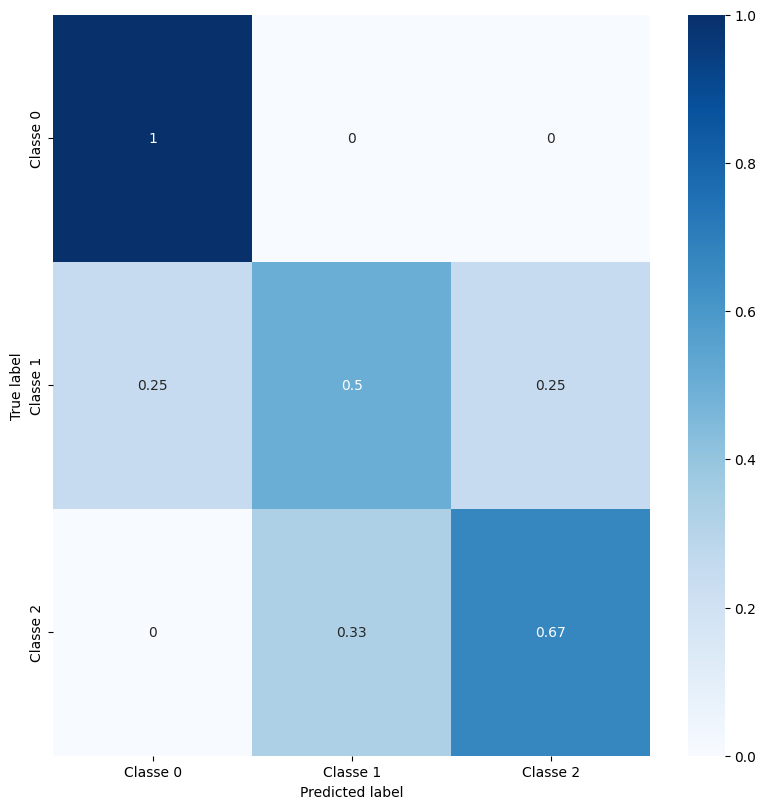

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index=classes,
                          columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
metricas_por_classe = {}

num_classes = len(classes)

for i in range(num_classes):
    VP = con_mat[i, i]
    FP = np.sum(con_mat[:, i]) - VP
    FN = np.sum(con_mat[i, :]) - VP
    VN = np.sum(con_mat) - (VP + FP + FN)

    metricas_por_classe[classes[i]] = {
        "VP": VP,
        "VN": VN,
        "FP": FP,
        "FN": FN
    }

for classe, valores in metricas_por_classe.items():
    print(f"\nClasse: {classe}")
    print(f"Verdadeiros Positivos (VP): {valores['VP']}")
    print(f"Verdadeiros Negativos (VN): {valores['VN']}")
    print(f"Falsos Positivos (FP): {valores['FP']}")
    print(f"Falsos Negativos (FN): {valores['FN']}")


Classe: Classe 0
Verdadeiros Positivos (VP): 3
Verdadeiros Negativos (VN): 6
Falsos Positivos (FP): 1
Falsos Negativos (FN): 0

Classe: Classe 1
Verdadeiros Positivos (VP): 2
Verdadeiros Negativos (VN): 5
Falsos Positivos (FP): 1
Falsos Negativos (FN): 2

Classe: Classe 2
Verdadeiros Positivos (VP): 2
Verdadeiros Negativos (VN): 6
Falsos Positivos (FP): 1
Falsos Negativos (FN): 1


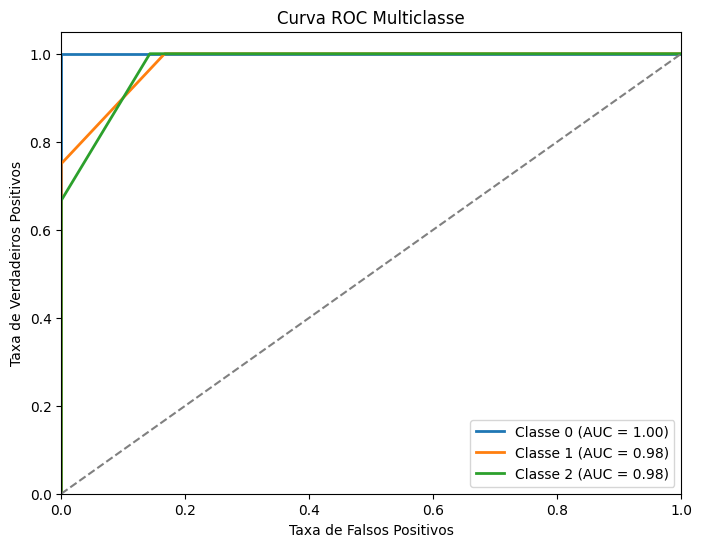

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plotar_curva_roc_multiclasse(y_true, y_scores, n_classes):
    """ Plota a curva ROC para um problema multiclasse """
    y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

    plt.figure(figsize=(8, 6))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Classe {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title("Curva ROC Multiclasse")
    plt.legend(loc="lower right")
    plt.show()

y_scores = np.array([
    [0.8, 0.1, 0.1],
    [0.2, 0.7, 0.1],
    [0.3, 0.6, 0.1],
    [0.7, 0.2, 0.1],
    [0.1, 0.3, 0.6],
    [0.2, 0.4, 0.4],
    [0.3, 0.5, 0.2],
    [0.6, 0.3, 0.1],
    [0.1, 0.2, 0.7],
    [0.2, 0.4, 0.4]
])

plotar_curva_roc_multiclasse(y_true, y_scores, n_classes=len(classes))
